# Sistemas de controle com python
Este é um python notebook, criado para realizar projetos de controladores em avanço, atraso, avanço e atraso por lugar das raises e por resposta em frequencia. Além da implementação de compensadores PI e PID.

| Role                 | Responsibility         | Full name                | e-mail       |
| -----              | ----------------       | -----------              | ---------    |
| Dev             | Author                 | `João Gustavo Atkinson Amorim`          | `joaogustavoamorim@gmail.com` |
| Dev             | Author                 | `Lucas Silva Ennes`          | `lucassilvaennes@gmail.com` |
| Teacher     | Co-author            | `Rodrigo Iván Goytia Mejia`            | `rodrigo-mejia@uergs.edu.br` |

  
Instalando a biblioteca control com pip. Esta [lib control](https://python-control.readthedocs.io/en/0.8.2/index.html) é a responsavel pelas funções de sistemas de controle utilizadas durante o código.

In [0]:
!pip install control

     |████████████████████████████████| 184kB 4.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/62/70/b3/4ff8c0348172e6b1fa8c9c2f1388e80d3e86f15f27d63c2e23
Successfully built control


Importando o modulo de compatibilidade com o MATLAB.
Este modulo possui as funções com os mesmos nomes encontrados no MATLAB.

In [0]:
from control.matlab import *

# Importações de bibliotecas

In [0]:
from control.matlab import *              # Biblioteca de controle
import numpy as np                        # Biblioteca com funções matematicas
import matplotlib as mpl                  
import matplotlib.pyplot as plt           # Para realizar plotagens de funções
from sympy import *                       # Para adicionar simbolos e resolver a equações

# Especificações de entradas

In [0]:
Nit        = 200                    # Número de iterações
t          = range(Nit)             # Tempo
ramp       = t                      # Rampa
step       = np.ones(Nit)           # Degrau
dist_p     = np.concatenate((np.zeros(round(Nit/2)),np.ones(round(Nit/2))), axis=0)
med        = 0;
stdn       = 0.05;
dist_n     = med + stdn * np.random.rand(Nit);

## Especificações da planta taco
### Modelo obtido utilizando um input PRBS com Frequencua de amostragem = 500 Hz
Giz =
 
    0.1203 z^-1
  ---------------
  1 - 0.9086 z^-1
  
G(s) = (0.1203 * z^-1) / (1 - 0.9086*z^-1)  =  (0.1203/z) *z/(z-0.9086) = 0.1203/(z-0.9086) = 63.08 /  (s + 47.93) 



  Especificações de MF:\
*    e(inf) <= 0.1  %erro no infinito
*    Mp%    <= 10   %overshoot
*    ts         <= 2     % segundos

*   50 < MFd < 60        % em graus, margem de fase desejada

*   Mp < 10
*   tau_mf = 5
*   ts = 4 * tau_mf


In [0]:
##planta TACO - 63.08 /  (s + 47.93)

Kp_MA           = 63.08
Numerador       = Kp_MA
Denominador     = np.array([1, 47.93], dtype=float)

ts_esp          = 0.01                                       # tempo de pico em segundos esperado
Mp_esp          = 10                                      # overshoot esperado em porcentagem
Mp_folga        = 5                                       # folga dada ao Mp, pq da aproximação de compensador para 2ª ordem
e_esp           = 0.001                      # margem de fase de segurança, variavel

tau_MA          = 1/47.93
tauMF_esp       = ts_esp/4                                # tau em MF
p               = 10

## Função para verificar comportamento do sistema com um controlador

In [0]:
def testControl(G_MA, C, step, ramp, t, dist_p, dist_n, stepInfoB = True):
  print("Malha Aberta")
  CG_MA       = C * G_MA
  print(f"C(s) * G(s) = {CG_MA}")

  print("*********************************************")
  print("Malha Fechada")
  G_MF        = feedback(CG_MA, 1)
  print(f"Gmf = {G_MF}")

  print("*********************************************")

  # Verifica as informações do sistema perante a uma entrada degrau
  if stepInfoB:
    infoG_MF     = stepinfo(G_MF)
    print(f"stepinfo: ")
    for info in infoG_MF:
      print(f"\t{info}: {infoG_MF[info]}")

  # Verifica a resposta em frequencia
  bode(G_MA)
  bode(CG_MA)
  print("Rlocus de C(s) * G(s):")
  rlocusCG_MA = rlocus(CG_MA)
  # resposta perante a entrada e root locus da planta
  y_step = lsim(G_MF, step, t)
  y_ramp = lsim(G_MF, ramp, t)
  plt.figure()                                                # create a plot figure
  plt.subplot(2, 2, 1) # (rows, columns, panel number)
  plt.plot(t, step)
  plt.plot(t, y_step[0])
  plt.legend(["R", "Gmf"])
  plt.subplot(2, 2, 2)
  plt.plot(t, ramp)
  plt.plot(t, y_ramp[0])
  plt.legend(["R", "Gmf"])
  plt.show()

    
  print("*********************************************")
  ymf_step2    = lsim(G_MF, dist_p, t);
  plt.figure()
  plt.plot(t, dist_p)
  plt.plot(t, ymf_step2[0])
  plt.legend(["R", "Gmf"])
  plt.ylabel("Amplitude")
  plt.show()
  
  # monta o sistema em MF com perturbações
  Gmf         = feedback(CG_MA, 1);
  Gd1         = feedback(G_MA, CG_MA);         # perturbação entre o controlador e a planta
  Gd2         = feedback(1, CG_MA);           # pertubação na saida da planta

  # verifica a resposta do sistema frente a um step
  yma_step    = lsim(G_MA, step, t);
  ymf_step    = lsim(G_MF, step, t);
  yd1_dist    = lsim(Gd1, dist_p, t);
  yd2_dist    = lsim(Gd2, dist_n, t);
  y_step      = ymf_step[0]+yd1_dist[0]+yd2_dist[0]
  

  # ----- calculo do erro
  yr = step
  er = yr-y_step
  
#   u = lsim(C, er, t)
  print("*********************************************")
  plt.plot(t, step)
  plt.plot(t, dist_p)
  plt.plot(t, dist_n)
  plt.plot(t, y_step)
  plt.legend(["R","dist_p", "dist_n", "Gmf"])
  plt.ylabel("Amplitude")
  plt.show()
  plt.plot(t, er)
  plt.legend("e")
  plt.ylabel("Erro")
  plt.show()
#   plt.plot(t, u[0])
#   plt.legend("u")
#   plt.ylabel("Controle")
#   plt.show()
  plt.plot(t, dist_p)
  plt.plot(t, dist_n)
  plt.legend(["dist_p", "dist_n"])
  plt.ylabel("Amplitude")
  plt.show()
  print("*********************************************")
  ev_MF         = ramp[-1] - y_ramp[0][-1]     #erro apos ser adicionado o controlador ao
  print(f"ev(∞) = {ev_MF}")
  ep_MF         = step[-1] - y_ramp[0][-1]     #erro apos ser adicionado o controlador ao
  print(f"ep(∞) = {ep_MF}")
  print("*********************************************")
  print("Rlocus de gmf")
  rlocusG_MF = rlocus(G_MF)

## 1. Verificando comportamento em MA (Malha Aberta)

Gma=
  63.08
---------
s + 47.93

e(∞) = -0.316085958689756
Polos de G(s) -> [-47.93]
Zeros de G(s) -> []


NameError: ignored

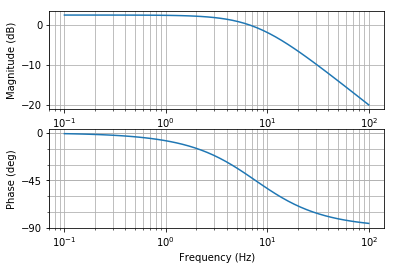

In [0]:
G_MA = tf(Numerador, Denominador)                          # FT em MA, C = 1
print(f"Gma={G_MA}")

e_MA = 1 - dcgain(G_MA)                                   # Erro da planta em MA
print(f"e(∞) = {e_MA}")

# Salva e exibe os polos e zeros da planta
polos_MA = pole(G_MA)
zeros_MA = zero(G_MA)
print(f"Polos de G(s) -> {polos_MA}")
print(f"Zeros de G(s) -> {zeros_MA}")

# Salva os dados de resposta em frequencia
[mag,phase,wout] = bode(G_MA);

testControl(G_MA=G_MA, C=1, step=step, ramp=ramp, t=t, dist_p=dist_p, dist_n=dist_n)

# Controlador em avanço por lugar das raises


## 2. Determinando as especificações do compensador

In [0]:
# Determinando ganho do compensador, Kc
Kp_s    = symbols('Kp_s')
eq_Kp   = [(1/(1+Kp_s)) - e_esp]
Kp      = solve(eq_Kp, Kp_s)
Kp      = Kp[Kp_s]

Kc_s    = symbols('Kc_s')
eq_Kc   = [((Kc_s*dcgain(G_MA)) - Kp)]
Kc      = solve(eq_Kc, Kc_s)
Kc      = round(Kc[Kc_s], 4)

print(f"Kc = {Kc}")

# Determinando o coeficiente de amortecimento, psi = ξ
psi     = np.arange(0, 1, 0.01)
MpVetor = 100*np.exp(((-1*psi*np.pi)/np.sqrt(1-psi**2)))
MpLoc   = np.where(MpVetor>=(Mp_esp-Mp_folga))[-1][-1] + 1
psi     = round(psi[MpLoc], 4)

print(f"ξ  = {psi}")

# Determinando a frequencia natural, Wn
Wn_s    = symbols('Wn_s')
eq_Wn   = [4/(psi*Wn_s)-ts_esp]
Wn      = solve(eq_Wn, Wn_s)
Wn      = round(Wn[Wn_s], 4)

print(f"Wn = {Wn}\t rad/s")

# Parametros de uma função de 2ª ordem
sigma   = psi * Wn
Wd      = Wn * np.sqrt(1-psi**2)

print(f"σ  = {sigma}")
print(f"Wd = {Wd}")

Kc = 759.069
ξ  = 0.7
Wn = 571.4286	 rad/s
σ  = 400.00001999999995
Wd = 408.081644892244


## 3. Determinando o polo e o zero do compensador

In [0]:
# Determinação do zero
  # a) polos dominantes do sistema
s = []
s.append(complex(-sigma, Wd))
s.append(complex(-sigma, -Wd))
  
  # b) determinando o polo
zero_c     = -sigma

print(f"Zero controlador -> {zero_c}")

# Determinação do polo
  # a) determinando theta, angulo entre o zero e o polo dominante
thetaZero   = np.arctan2(s[0].imag, s[0].real - zero_c.real)
thetaZeroD  = np.degrees(thetaZero)
print(f"Angulo entre o zero do controlador e o polo dominante = ϴ =")
print(f"\t= {round(thetaZeroD,4)}º = {round(thetaZero,4)} rad")

  # b) determinando phi pela condição de fase
phiPolo = []
textSum = "("

for k in range(len(polos_MA)):
  phiPolo.append(np.arctan2(s[0].imag, s[0].real - polos_MA[k]))
  print(f"φ{k} = {round(phiPolo[-1], 4)} rad")
  textSum += f"+ {round(np.degrees(phiPolo[-1]), 3)} "
textSum += ")"

phiPoloD    = np.degrees(phiPolo)
phiPolo_C   = (180 - np.sum(phiPoloD) + thetaZeroD)
print(polos_MA)
print(f"Angulo entre o polo do controlador e o polo dominante = φ{len(polos_MA)} =")
print(f"\t= 180 - {textSum} + {round(thetaZeroD,3)} =")
print(f"\t= {round(phiPolo_C, 4)}º = {round(np.radians(phiPolo_C),4)} rad")

  # c) determinando localização do polo
d_s         = symbols('d_s')
eq_d        = [s[0].imag/d_s - np.tan(np.radians(phiPolo_C))]
d           = solve(eq_d, d_s)
polo_c      = -1*(d[d_s] + abs(sigma))
print(f"Polo controlador -> {polo_c}")

Zero controlador -> -400.00001999999995
Angulo entre o zero do controlador e o polo dominante = ϴ =
	= 90.0º = 1.5708 rad
φ0 = 2.2826 rad
[-47.93]
Angulo entre o polo do controlador e o polo dominante = φ1 =
	= 180 - (+ 130.786 ) + 90.0 =
	= 139.2142º = 2.4297 rad
Polo controlador -> 73.0042673231852


## 4. Determinar o ganho do controlador, Kc, usando a condição de módulo

In [0]:
h = []
for k in range(len(polos_MA)): 
  h.append(np.sqrt((Wd-abs(polos_MA[k].imag))**2 + (abs(sigma) - abs(polos_MA[k].real))**2))
h.append(np.sqrt(float(((Wd-0)**2 + (abs(sigma) - abs(polo_c))**2))))

c = sqrt((Wd-0)**2 + (abs(sigma) - abs(zero_c))**2)

Kc = np.prod(h) / (c*Kp_MA) 

print(f"Kc  = {Kc}")

Kc  = 10.9488047933376


## 5. Monta controlador com os parametros determinados

In [0]:
numC    = np.array([1, -zero_c], dtype=float)
denC    = np.array([1, -polo_c], dtype=float)
C       = tf(float(Kc)*numC, denC)           # Controlador m avanço
print(f"Control of advancement = Kc * (s+z)/(s+p) = ")
print(f"\t= {Kc} *  (s+z)/(s+p) = \t{C}")

Control of advancement = Kc * (s+z)/(s+p) = 
	= 10.9488047933376 *  (s+z)/(s+p) = 	
10.95 s + 4380
--------------
    s - 73



## 6. Verifica o comportamento do sistema com o compensador

Malha Aberta
C(s) * G(s) = 
690.7 s + 2.763e+05
--------------------
s^2 - 25.07 s - 3499

*********************************************
Malha Fechada
Gmf = 
   690.7 s + 2.763e+05
-------------------------
s^2 + 665.6 s + 2.728e+05

*********************************************
stepinfo: 
	RiseTime: 0.0016212701921384483
	SettlingTime: 0.009095957441607919
	SettlingMin: 0.9126694126313647
	SettlingMax: 1.2587459277172388
	Overshoot: 24.13486078500621
	Undershoot: 0.0
	Peak: 1.2587459277172388
	PeakTime: 0.004316368693355609
	SteadyStateValue: 1.0140148542940792
Rlocus de C(s) * G(s):


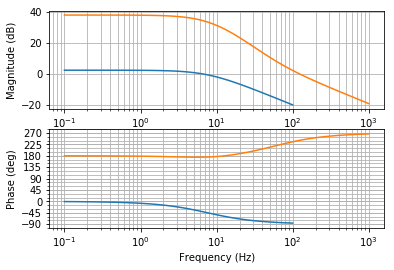

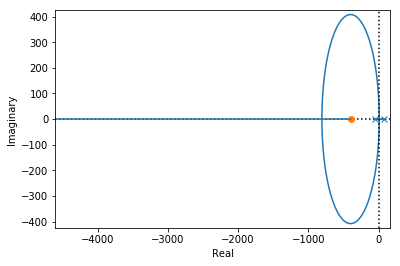

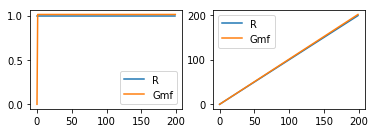

*********************************************


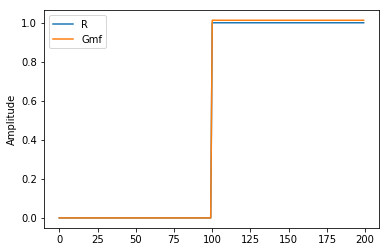

*********************************************


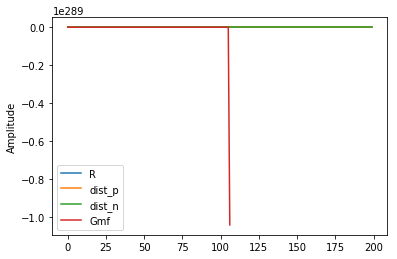

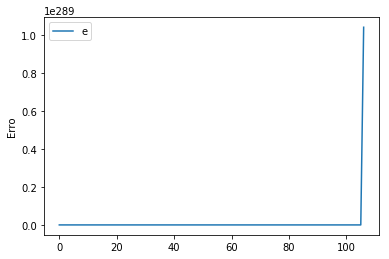

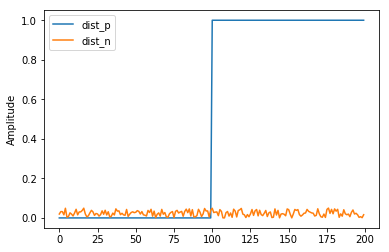

*********************************************
ev(∞) = -2.552916050583633
ep(∞) = -200.55291605058363
*********************************************
Rlocus de gmf


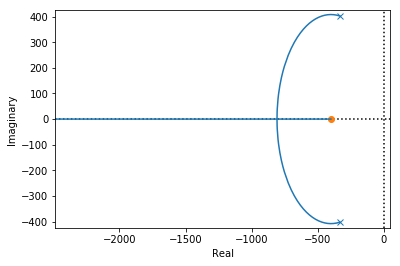

In [0]:
testControl(G_MA=G_MA, C=C, step=step, ramp=ramp, t=t, dist_p=dist_p, dist_n=dist_n)

# Controlador em atraso por lugar das raises


## 2. Determinando as especificações do compensador

In [0]:
# Determinando ganho do compensador, Kc
Kp_s    = symbols('Kp_s')
eq_Kp   = [(1/(1+Kp_s)) - e_esp]
Kp      = solve(eq_Kp, Kp_s)
Kp      = Kp[Kp_s]

Kc_s    = symbols('Kc_s')
eq_Kc   = [((Kc_s*dcgain(G_MA)) - Kp)]
Kc      = solve(eq_Kc, Kc_s)
Kc      = round(Kc[Kc_s], 4)

print(f"Kc = {Kc}")

# Determinando o coeficiente de amortecimento, psi = ξ
psi     = np.arange(0, 1, 0.01)
MpVetor = 100*np.exp(((-1*psi*np.pi)/np.sqrt(1-psi**2)))
MpLoc   = np.where(MpVetor>=(Mp_esp-Mp_folga))[-1][-1] + 1
psi     = round(psi[MpLoc], 4)

print(f"ξ  = {psi}")

# Determinando a frequencia natural, Wn
Wn_s    = symbols('Wn_s')
eq_Wn   = [4/(psi*Wn_s)-ts_esp]
Wn      = solve(eq_Wn, Wn_s)
Wn      = round(Wn[Wn_s], 4)

print(f"Wn = {Wn}\t rad/s")

# Parametros de uma função de 2ª ordem
sigma   = psi * Wn
Wd      = Wn * np.sqrt(1-psi**2)

print(f"σ  = {sigma}")
print(f"Wd = {Wd}")

Kc = 6.8385
ξ  = 0.7
Wn = 571.4286	 rad/s
σ  = 400.00001999999995
Wd = 408.081644892244


## 3. Determinando o polo e o zero do compensador

In [0]:
# Determinação do zero
#   % A) determinando o zero e o polo do controlador
#     % polo =  tem que ser um valor pequeno
#     % zero = polo + delta
#     % polo e o zero tem que estar proximos de zero para amplificar 
#     % Kc deve ser aproximadamente 1, mas nao foi calculado ainda, isto deve
#     % ocorrer para que nao ocorra erro no regime transitorio

# % Segunda tentativa / chute
polo_c = 0.01;  #% polo do controlador
#     %Kp = lim {Kc *G(s)*(s+Z_c)/(s+P_c)} quando s tende a 0
zero_c = float(polo_c*(Kp / dcgain(G_MA)));

print(f"Zero controlador -> {zero_c}")
print(f"Polo controlador -> {polo_c}")

Zero controlador -> 0.0683845909955612
Polo controlador -> 0.01


## 4. Determinar o ganho do controlador, Kc, usando a condição de módulo

In [0]:
h = []
for k in range(len(polos_MA)): 
  h.append(np.sqrt((Wd-abs(polos_MA[k].imag))**2 + (abs(sigma) - abs(polos_MA[k].real))**2))
h.append(np.sqrt(float(((Wd-0)**2 + (abs(sigma) - abs(polo_c))**2))))

c = sqrt((Wd-0)**2 + (abs(sigma) - abs(zero_c))**2)

Kc = np.prod(h) / (c*Kp_MA)

print(f"Kc  = {Kc}")

Kc  = 8.54477105118601


## 5. Monta controlador com os parametros determinados

In [0]:
numC    = np.array([1, zero_c], dtype=float)
denC    = np.array([1, polo_c], dtype=float)
C       = tf(float(Kc)*numC, denC)           # Controlador em atraso
print(f"Control of lag = Kc * (s+z)/(s+p) = ")
print(f"\t= {Kc} *  (s+z)/(s+p) = \t{C}")

Control of lag = Kc * (s+z)/(s+p) = 
	= 8.54477105118601 *  (s+z)/(s+p) = 	
8.545 s + 0.5843
----------------
    s + 0.01



## 6. Verifica o comportamento do sistema com o compensador

Malha Aberta
C(s) * G(s) = 
    539 s + 36.86
----------------------
s^2 + 47.94 s + 0.4793

*********************************************
Malha Fechada
Gmf = 
    539 s + 36.86
---------------------
s^2 + 586.9 s + 37.34

*********************************************
stepinfo: 
	RiseTime: 0.0
	SettlingTime: 19.603832626641328
	SettlingMin: 0.918894863469194
	SettlingMax: 0.9871008232042636
	Overshoot: 0.0
	Undershoot: 0.0
	Peak: 0.9871008232042636
	PeakTime: 110.02375726974542
	SteadyStateValue: 0.9871008232042636
Rlocus de C(s) * G(s):


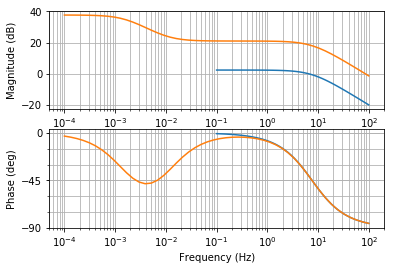

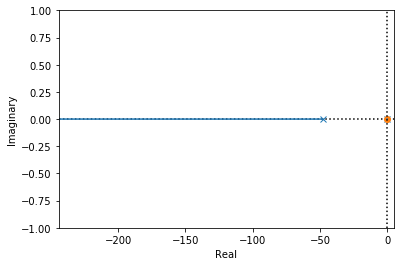

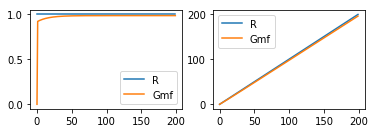

*********************************************


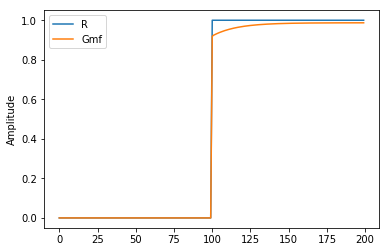

*********************************************


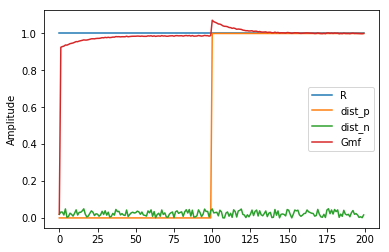

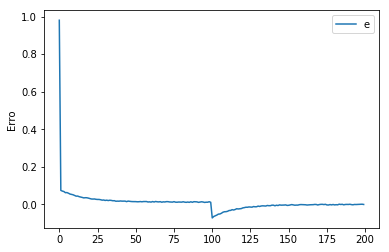

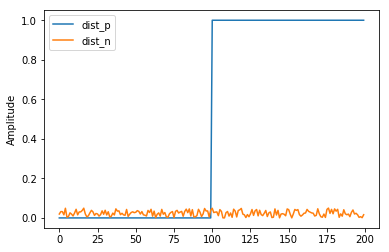

*********************************************
ev(∞) = 3.6365920862997427
ep(∞) = -194.36340791370026
*********************************************
Rlocus de gmf


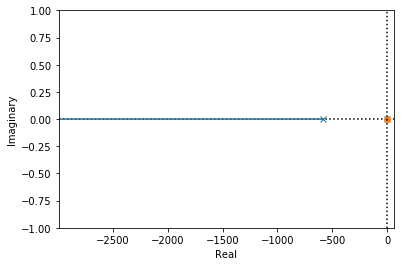

In [0]:
testControl(G_MA=G_MA, C=C, step=step, ramp=ramp, t=t, dist_p=dist_p, dist_n=dist_n)

# Controlador em avanço e atraso por lugar das raises



## 2. Determinando as especificações do compensador

In [0]:
# Determinando ganho do compensador, Kc
Kp_s    = symbols('Kp_s')
eq_Kp   = [(1/(1+Kp_s)) - e_esp]
Kp      = solve(eq_Kp, Kp_s)
Kp      = Kp[Kp_s]

print(f"Kp = {Kp}")
# Determinando o coeficiente de amortecimento, psi = ξ
psi     = np.arange(0, 1, 0.01)
MpVetor = 100*np.exp(((-1*psi*np.pi)/np.sqrt(1-psi**2)))
MpLoc   = np.where(MpVetor>=(Mp_esp-Mp_folga))[-1][-1] + 1
psi     = round(psi[MpLoc], 4)

print(f"ξ  = {psi}")


# Determinando a frequencia natural, Wn
Wn_s    = symbols('Wn_s')
eq_Wn   = [4/(psi*Wn_s)-ts_esp]
Wn      = solve(eq_Wn, Wn_s)
Wn      = round(Wn[Wn_s], 4)
# Wn      = 3 #%consideração feita devido a planta ser de 3ra ordem

print(f"Wn = {Wn}\t rad/s")

# Parametros de uma função de 2ª ordem
sigma   = psi * Wn
Wd      = Wn * np.sqrt(1-psi**2)

print(f"σ  = {sigma}")
print(f"Wd = {Wd}")

Kp = 9.00000000000000
ξ  = 0.7
Wn = 571.4286	 rad/s
σ  = 400.00001999999995
Wd = 408.081644892244


## 3. Determinando o polo e o zero do compensador

In [0]:
# Determinação do zero
  # a) polos dominantes do sistema
s = []
s.append(complex(-sigma, Wd))
s.append(complex(-sigma, -Wd))
  
  # b) determinando o polo
zero_c     = -sigma
# zero_c     = -0.5
print(f"Zero controlador -> {zero_c}")

# Determinação do polo
  # a) determinando theta, angulo entre o zero e o polo dominante
thetaZero   = np.arctan2(s[0].imag, s[0].real - zero_c.real)
thetaZeroD  = np.degrees(thetaZero)
print(f"Angulo entre o zero do controlador e o polo dominante = ϴ =")
print(f"\t= {round(thetaZeroD,4)}º = {round(thetaZero,4)} rad")

  # b) determinando phi pela condição de fase
phiPolo = []
textSum = "("

for k in range(len(polos_MA)):
  phiPolo.append(np.arctan2(s[0].imag, s[0].real - polos_MA[k]))
  print(f"φ{k} = {round(phiPolo[-1], 4)} rad")
  textSum += f"+ {round(np.degrees(phiPolo[-1]), 3)} "
textSum += ")"

phiPoloD    = np.degrees(phiPolo)
phiPolo_C   = (180 - np.sum(phiPoloD) + thetaZeroD)

print(f"Angulo entre o polo do controlador e o polo dominante = φ{len(polos_MA)} =")
print(f"\t= 180 - {textSum} + {round(thetaZeroD,3)} =")
print(f"\t= {round(phiPolo_C, 4)}º = {round(np.radians(phiPolo_C),4)} rad")

  # c) determinando localização do polo
d_s         = symbols('d_s')
eq_d        = [s[0].imag/d_s - np.tan(np.radians(phiPolo_C))]
d           = solve(eq_d, d_s)
polo_c      = -1*(d[d_s] + abs(sigma))
print(f"Polo controlador -> {polo_c}")

Zero controlador -> -400.00001999999995
Angulo entre o zero do controlador e o polo dominante = ϴ =
	= 90.0º = 1.5708 rad
φ0 = 2.2826 rad
Angulo entre o polo do controlador e o polo dominante = φ1 =
	= 180 - (+ 130.786 ) + 90.0 =
	= 139.2142º = 2.4297 rad
Polo controlador -> 73.0042673231852


## 4. Determinar o ganho do controlador, Kc, usando a condição de módulo

In [0]:
h = []
for k in range(len(polos_MA)): 
  h.append(np.sqrt((Wd-abs(polos_MA[k].imag))**2 + (abs(sigma) - abs(polos_MA[k].real))**2))
h.append(np.sqrt(float(((Wd-0)**2 + (abs(sigma) - abs(polo_c))**2))))

c = sqrt((Wd-0)**2 + (abs(sigma) - abs(zero_c))**2)

Kc = np.prod(h) / (c*Kp_MA)

print(f"Kc  = {Kc}")

Kc  = 10.9488047933376


## 5. Monta controlador de avanço com os parametros determinados

In [0]:
numC    = np.array([1, -zero_c], dtype=float)
denC    = np.array([1, -polo_c], dtype=float)
C_adv   = tf(numC, denC)                     # Controlador em avanço
C       = tf(float(Kc)*numC, denC)           # Controlador em avanço com Kc
print(f"Control of advancement = Kc * (s+z)/(s+p) = ")
print(f"\t= {Kc} *  (s+z)/(s+p) = \t{C}")

Control of advancement = Kc * (s+z)/(s+p) = 
	= 10.9488047933376 *  (s+z)/(s+p) = 	
10.95 s + 4380
--------------
    s - 73



## 6. Verifica o comportamento do sistema com o compensador de avanço

Malha Aberta
C(s) * G(s) = 
690.7 s + 2.763e+05
--------------------
s^2 - 25.07 s - 3499

*********************************************
Malha Fechada
Gmf = 
   690.7 s + 2.763e+05
-------------------------
s^2 + 665.6 s + 2.728e+05

*********************************************
stepinfo: 
	RiseTime: 0.0016212701921384483
	SettlingTime: 0.009095957441607919
	SettlingMin: 0.9126694126313647
	SettlingMax: 1.2587459277172388
	Overshoot: 24.13486078500621
	Undershoot: 0.0
	Peak: 1.2587459277172388
	PeakTime: 0.004316368693355609
	SteadyStateValue: 1.0140148542940792
Rlocus de C(s) * G(s):


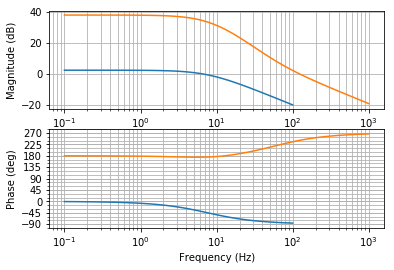

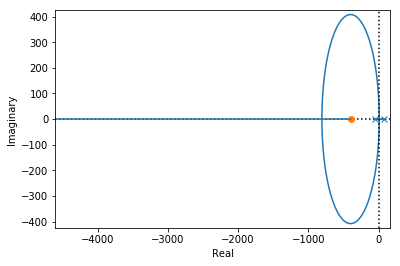

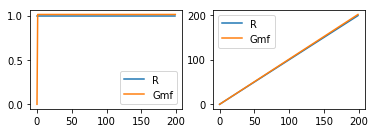

*********************************************


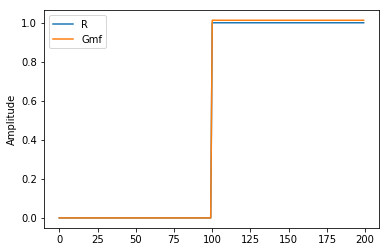

*********************************************


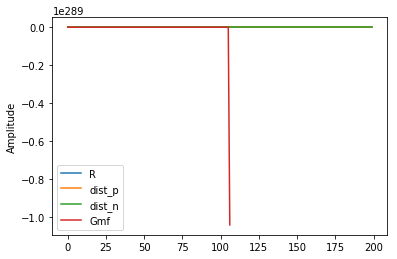

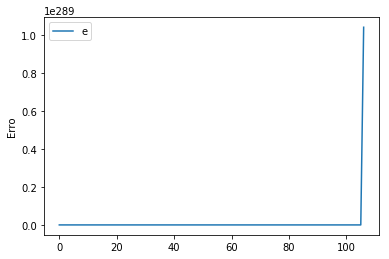

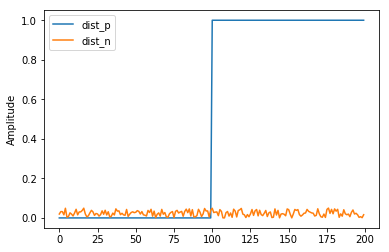

*********************************************
ev(∞) = -2.552916050583633
ep(∞) = -200.55291605058363
*********************************************
Rlocus de gmf


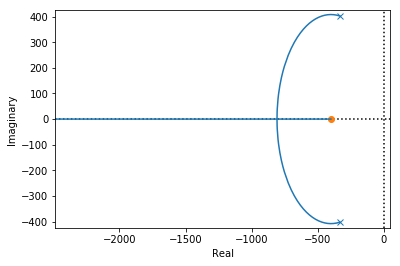

In [0]:
testControl(G_MA=G_MA, C=C, step=step, ramp=ramp, t=t, dist_p=dist_p, dist_n=dist_n)

## 7. Determina os parametros do compensador de atraso e monta o compensador de atraso e avanço

In [0]:
# primeira opção de G(s)
# %Kp = lim {s * Kc * G(s) * (s+Z_c)/(s+P_c) * C_av} quando s tende a 0
# 0.756672196 * 63.08/47.93 * -0.19999/-0.20086 * z/p> 9
# 0.9915 *z/p >9
# z/p > 9.0772
# p = 0.02
# z > 0.1815
C_lag = tf([1, 5],[1, 0.02])
# Monta o controlador em atraso e avanço
C = float(Kc) * C_lag * C_adv

## 8. Verifica o comportamento do sistema com o compensador de avanço e atraso

Malha Aberta
C(s) * G(s) = 
690.7 s^2 + 2.797e+05 s + 1.381e+06
-----------------------------------
  s^3 - 25.05 s^2 - 3500 s - 69.98

*********************************************
Malha Fechada
Gmf = 
   690.7 s^2 + 2.797e+05 s + 1.381e+06
-----------------------------------------
s^3 + 665.6 s^2 + 2.762e+05 s + 1.381e+06

*********************************************
stepinfo: 
	RiseTime: 0.0013842755179333784
	SettlingTime: 0.00968992862553365
	SettlingMin: 0.9927017391279013
	SettlingMax: 1.2623801506890726
	Overshoot: 26.230196019635443
	Undershoot: 0.0
	Peak: 1.2623801506890726
	PeakTime: 0.004152826553800135
	SteadyStateValue: 1.0000619427800825
Rlocus de C(s) * G(s):


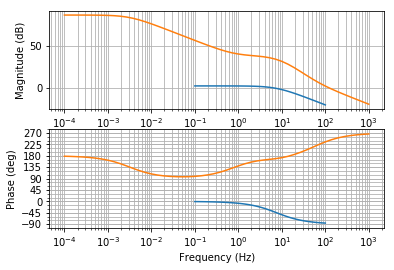

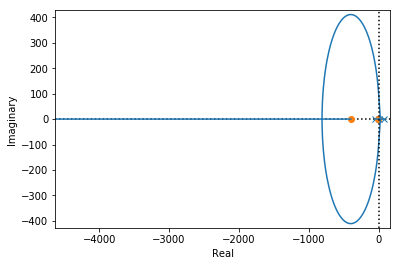

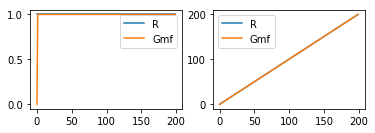

*********************************************


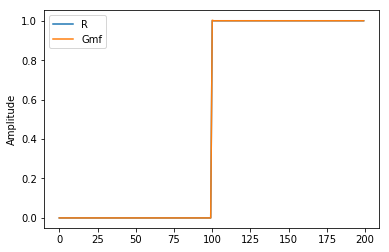

*********************************************


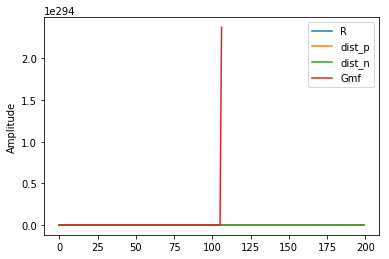

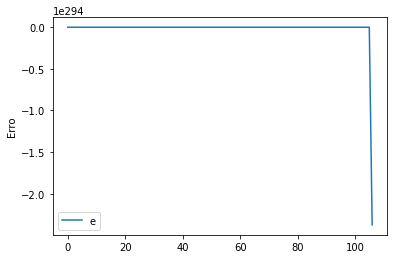

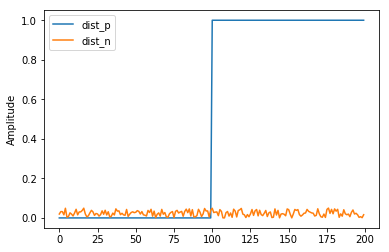

*********************************************
ev(∞) = -0.012606141720311825
ep(∞) = -198.0126061417203
*********************************************
Rlocus de gmf


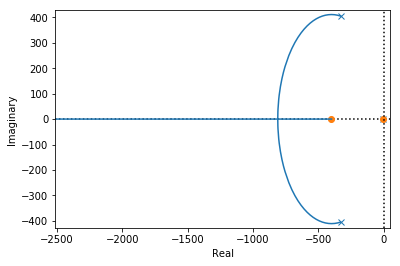

In [0]:
testControl(G_MA=G_MA, C=C, step=step, ramp=ramp, t=t, dist_p=dist_p, dist_n=dist_n)

# Controlador em avanço por resposta em frequencia


## 2. Determinando as especificações do compensador

In [0]:
# Determinando ganho do compensador, Kc
Kv_min  = 1 / e_esp
Kp      = Kp_MA

Kc      = Kv_min / Kp

print(f"Kc = {Kc}")

Kc = 15.85288522511097


## 3. Avaliação do comportamento do sistema sendo C(s) = Kc

φ_max = -32.74723926274049


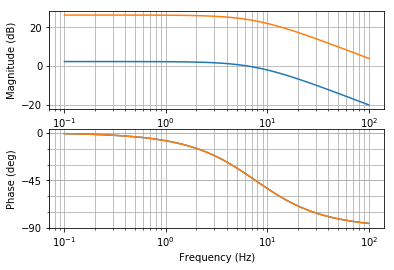

In [0]:
Cav                  = Kc
Gma_Cav              = G_MA*Cav
bode(G_MA)
bode(Gma_Cav)

[gm, pm, wcg, wcp]   = margin(Gma_Cav)             # Verificando a MF e MG do sistema, MF= margem de fase, MG = margem de ganho
MFkc                 = pm;                         # margem de fase após o Kc
phiMax               = MFd - MFkc + MFseg          # em graus
print(f"φ_max = {phiMax}")

## 4. Determina o valor a do compensador

In [0]:
a = (1-np.sin(np.radians(phiMax))) / (1+np.sin(np.radians(phiMax)))
print(f"a = {a}")

a = 3.3566715143598125


## 5.  Determinar a localização da resposnta em frequencia (RF) do compensador, Wm


In [0]:
C_jwm = 20 * np.log10(Kc/np.sqrt(a))        # em Db

magDb = 20 * np.log10(mag)
# % Lugar em que cruzar pela reta [-C_jwm -C_jwm] é referente a frequencia Wm
  # % encontra o ponto de cruzamento
magDbLoc  = np.where(magDb >= -float((C_jwm)))[-1][-1]
Wm        = round(wout[magDbLoc], 4)
print(f"C(jWm) = {C_jwm}")
print(f"Wm = {Wm}")

C(jWm) = 18.74307787645304
Wm = 473.9482


## 6. Determinar do parametro T do compensador

In [0]:
T = 1 /(np.sqrt(a)*Wm)
print(f"T = {T}")

T = 0.001151634588910025


## 7. Monta controlador com os parametros determinados

In [0]:
numC    = np.array([T, 1], dtype=float)
denC    = np.array([T*a, 1], dtype=float)
C       = tf(float(Kc)*numC, denC)           # Controlador m avanço
print(f"Control of advancement = Kc * (T*s+1)/(T*a*s+1) = ")
print(f"\t= {Kc} *  ({round(T,2)}*s+1)/({round(T,2)}*{round(a,2)}*s+1) = \t{C}")

Control of advancement = Kc * (T*s+1)/(T*a*s+1) = 
	= 15.85288522511097 *  (0.0*s+1)/(0.0*3.36*s+1) = 	
0.01826 s + 15.85
-----------------
  0.003866 s + 1



## 8. Verifica o comportamento do sistema com o compensador

Malha Aberta
C(s) * G(s) = 
        1.152 s + 1000
------------------------------
0.003866 s^2 + 1.185 s + 47.93

*********************************************
Malha Fechada
Gmf = 
        1.152 s + 1000
-----------------------------
0.003866 s^2 + 2.337 s + 1048

*********************************************
stepinfo: 
	RiseTime: 0.002735426598677535
	SettlingTime: 0.010014443140921144
	SettlingMin: 0.8605575084812724
	SettlingMax: 1.0851138991379286
	Overshoot: 13.617558990490103
	Undershoot: 0.0
	Peak: 1.0851138991379286
	PeakTime: 0.005888121661560118
	SteadyStateValue: 0.9550582751287181
Rlocus de C(s) * G(s):


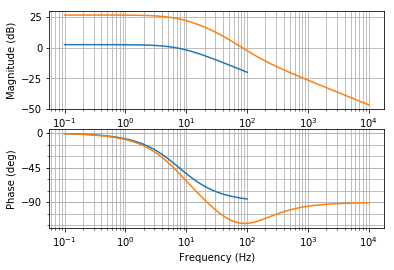

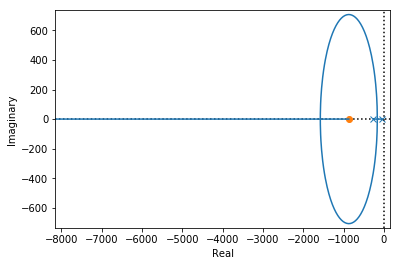

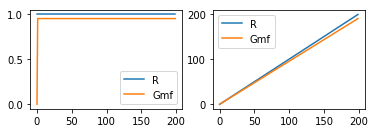

*********************************************


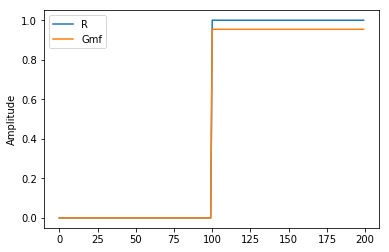

*********************************************


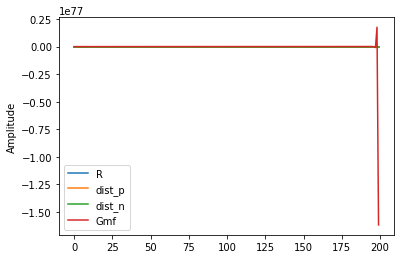

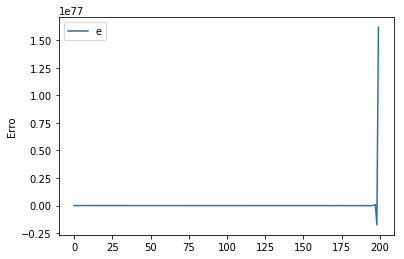

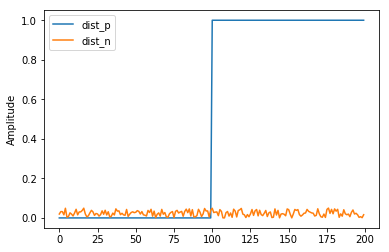

*********************************************
ev(∞) = 9.102848850296766
ep(∞) = -188.89715114970323
*********************************************
Rlocus de gmf


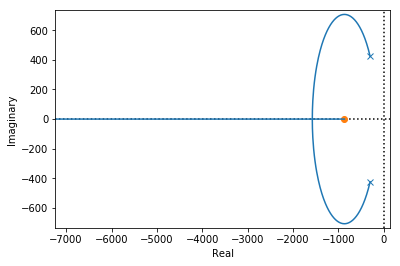

In [0]:
testControl(G_MA=G_MA, C=C, step=step, ramp=ramp, t=t, dist_p=dist_p, dist_n=dist_n)

# Controlador em atraso por resposta em frequencia


## 2. Determinando as especificações do compensador

In [0]:
# Determinando ganho do compensador, Kc
Kv_min  = 1 / e_esp
Kp      = Kp_MA

Kc      = Kv_min / Kp

print(f"Kc = {Kc}")

Kc = 15.85288522511097


## 3. Avaliação do comportamento do sistema sendo C(s) = Kc

φ_max = -32.74723926274049


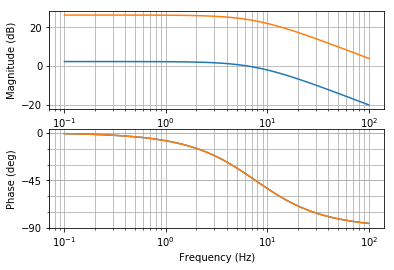

In [0]:
C_lag                = Kc
Gma_Clag             = G_MA*Kc
bode(G_MA)
bode(Gma_Clag)

[gm, pm, wcg, wcp]   = margin(Gma_Clag)             # Verificando a MF e MG do sistema, MF= margem de fase, MG = margem de ganho
MFkc                 = pm;                         # margem de fase após o Kc
phiMax               = MFd - MFkc + MFseg          # em graus
print(f"φ_max = {phiMax}")

## 4.  Determinar a localização da resposnta em frequencia (RF) do compensador, Wm


In [0]:
C_jwm = 20 * np.log10(Kc/np.sqrt(a))        # em Db

magDb = 20 * np.log10(mag)

# % Lugar em que cruzar pela reta [-C_jwm -C_jwm] é referente a frequencia Wm
  # % encontra o ponto de cruzamento
phaseLoc  = np.where(180+np.degrees(phase) >= (MFseg+MFd))[-1][0] - 1  #primeiro seleciona o array (só retorna 1), depois seleciona qual item (0 ==first, -1 == last)
Wcd       = round(wout[phaseLoc], 4)
print(f"C(jWm) = {C_jwm}")
print(f"Wcd = {Wcd}")

C(jWm) = 18.74307787645304
Wcd = 628.3185


## 5. Determina o valor a do compensador

a = 1.825474966644313


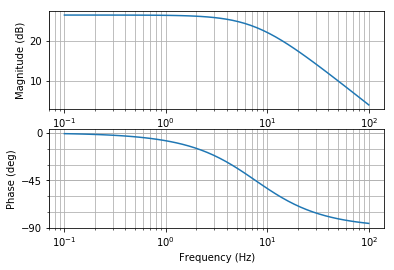

In [0]:
[mag_Clag,phase_Clag,wout_Clag] = bode(Gma_Clag);
magDb_Cat                       = 20*np.log10(mag_Clag);
wLoc                            = np.where(wout >= Wcd)[-1][-1]-1
KcG_WCD                         = magDb_Cat[wLoc]
a                               = 10**(abs(KcG_WCD)/20)
print(f"a = {a}")

## 6. Determinar do parametro T do compensador

In [0]:
T = 10 /(Wcd)
print(f"T = {T}")

T = 0.015915495087284556


## 7. Monta controlador com os parametros determinados

In [0]:
numC    = np.array([T, 1], dtype=float)
denC    = np.array([T*a, 1], dtype=float)
C       = tf(float(Kc)*numC, denC)           # Controlador em atraso
print(f"Control of lag = Kc * (T*s+1)/(T*a*s+1) = ")
print(f"\t= {Kc} *  ({round(T,2)}*s+1)/({round(T,2)}*{round(a,2)}*s+1) = \t{C}")

Control of lag = Kc * (T*s+1)/(T*a*s+1) = 
	= 15.85288522511097 *  (0.02*s+1)/(0.02*1.83*s+1) = 	
0.2523 s + 15.85
----------------
  0.02905 s + 1



## 8. Verifica o comportamento do sistema com o compensador

Malha Aberta
C(s) * G(s) = 
        15.92 s + 1000
-----------------------------
0.02905 s^2 + 2.393 s + 47.93

*********************************************
Malha Fechada
Gmf = 
       15.92 s + 1000
----------------------------
0.02905 s^2 + 18.31 s + 1048

*********************************************
stepinfo: 
	RiseTime: 0.0037416183602981433
	SettlingTime: 0.006272713133441004
	SettlingMin: 0.8627541874757405
	SettlingMax: 0.9599424396586262
	Overshoot: 0.5938653588360147
	Undershoot: 0.0
	Peak: 0.9599424396586262
	PeakTime: 0.012765521464546606
	SteadyStateValue: 0.9542753290514712
Rlocus de C(s) * G(s):


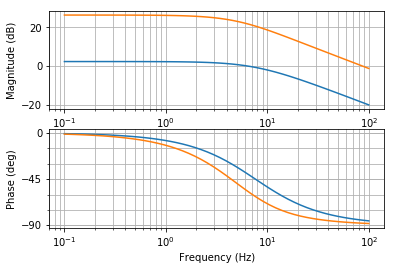

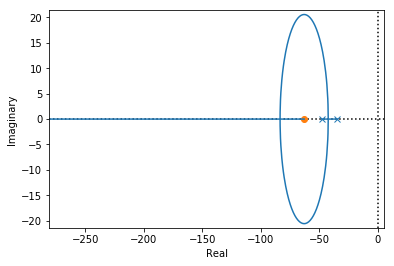

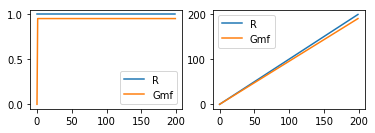

*********************************************


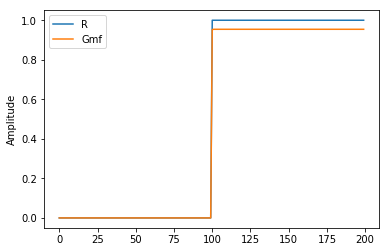

*********************************************


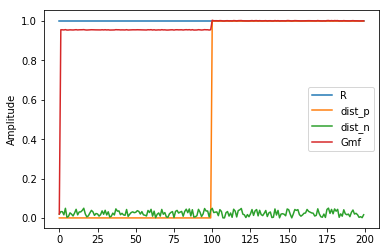

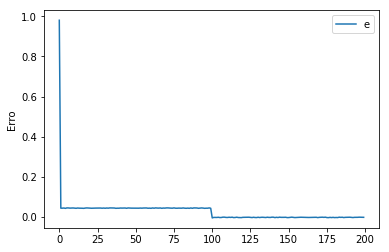

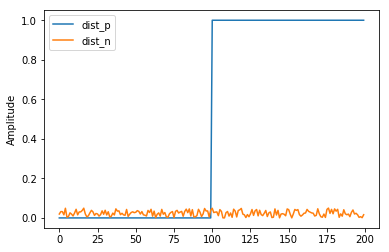

*********************************************
ev(∞) = 9.103303806631544
ep(∞) = -188.89669619336846
*********************************************
Rlocus de gmf


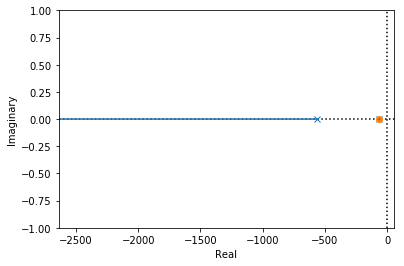

In [0]:
testControl(G_MA=G_MA, C=C, step=step, ramp=ramp, t=t, dist_p=dist_p, dist_n=dist_n)

# Controlador Proporcional Integrador (PI) por alocação dos polos


## 2. Determinar parametros do compensador


In [0]:
# Determinando o coeficiente de amortecimento, psi = ξ
psi     = np.arange(0, 1, 0.01)
MpVetor = 100*np.exp(((-1*psi*np.pi)/np.sqrt(1-psi**2)))
MpLoc   = np.where(MpVetor>=(Mp_esp-Mp_folga))[-1][-1] + 1
psi     = round(psi[MpLoc], 4)

print(f"ξ  = {psi}")

# Determinando a frequencia natural, Wn
Wn_s    = symbols('Wn_s')
eq_Wn   = [4/(psi*Wn_s)-ts_esp]
Wn      = solve(eq_Wn, Wn_s)
Wn      = round(Wn[Wn_s], 4)

print(f"Wn = {Wn}\t rad/s")

# Parametros de uma função de 2ª ordem
sigma   = psi * Wn
Wd      = Wn * np.sqrt(1-psi**2)

print(f"σ  = {sigma}")
print(f"Wd = {Wd}")

ξ  = 0.7
Wn = 571.4286	 rad/s
σ  = 400.00001999999995
Wd = 408.081644892244


## 3. Determinar equação caracteristica em MF   (Somete denominador)

In [0]:
eqc_MF = tf(1, np.array([1,2*psi*Wn,Wn**2], dtype=float))
print(f"Eqc_MF = {eqc_MF}")

Eqc_MF = 
           1
-----------------------
s^2 + 800 s + 3.265e+05



## 4. Projetando o compensador PI

In [0]:
# parametros do compensador
Kc = (2 * psi * Wn * tau_MA - 1) / Kp_MA
Ti = (2 * psi * Wn * tau_MA - 1) / (tau_MA*Wn**2)

print(f"Kc = {Kc}")
print(f"Ti = {Ti}")

# Compensador PI
C = tf(np.array([Ti,1], dtype=float), np.array([Ti,0], dtype=float))

print(f"C = {C}")

Kc = 0.24874775767503893
Ti = 0.002303214267178568
C = 
0.002303 s + 1
--------------
  0.002303 s



## 5. Verifica o comportamento do sistema com o compensador

Malha Aberta
C(s) * G(s) = 
    0.1453 s + 63.08
-----------------------
0.002303 s^2 + 0.1104 s

*********************************************
Malha Fechada
Gmf = 
        0.1453 s + 63.08
-------------------------------
0.002303 s^2 + 0.2557 s + 63.08

*********************************************
Rlocus de C(s) * G(s):


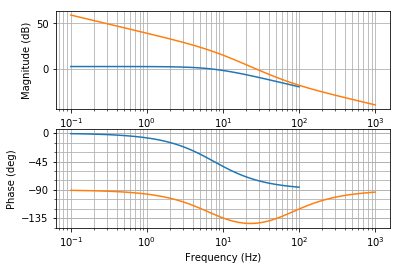

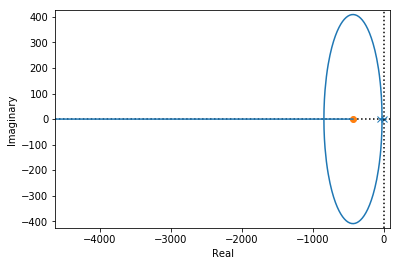

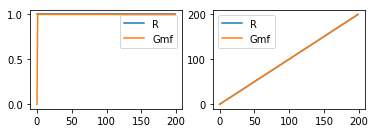

*********************************************


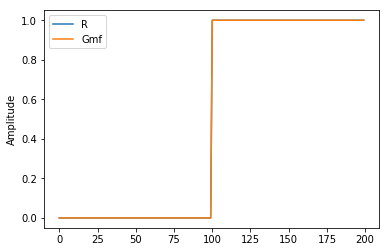

*********************************************


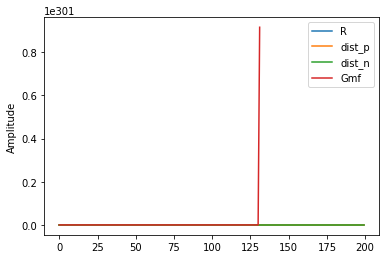

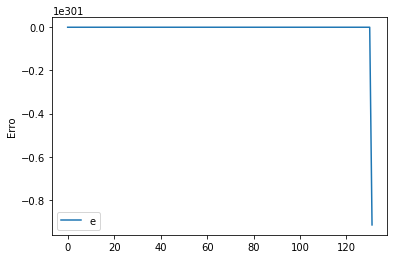

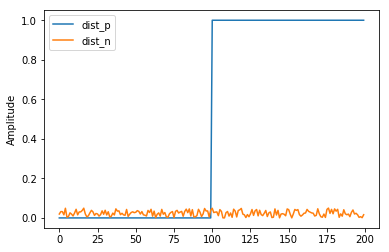

*********************************************
ev(∞) = 0.001750048508540658
ep(∞) = -197.99824995149146
*********************************************
Rlocus de gmf


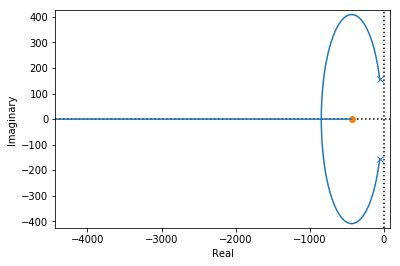

In [0]:
testControl(G_MA=G_MA, C=C, step=step, ramp=ramp, t=t, dist_p=dist_p, dist_n=dist_n, stepInfoB=False)

# Controlador Proporcional Integrador (PI) por cancelamento dos polos



## 2. Determinar parametros do compensador

In [0]:
lmbda = 0.5      # rapido
# % lambda = 1   %igual
# % lambda = 2   %lento

## 3. Projetando o compensador PI

In [0]:
# parametros do compensador
Kc = 1/(lmbda*Kp_MA)
Ti = tau_MA

print(f"Kc = {Kc}")
print(f"Ti = {Ti}")

# Compensador PI
C = tf(np.array([Ti,1], dtype=float), np.array([Ti,0], dtype=float))

print(f"C = {C}")

Kc = 0.031705770450221944
Ti = 0.020863759649488837
C = 
0.02086 s + 1
-------------
  0.02086 s



## 4. Verifica o comportamento do sistema com o compensador

Malha Aberta
C(s) * G(s) = 
1.316 s + 63.08
---------------
0.02086 s^2 + s

*********************************************
Malha Fechada
Gmf = 
       1.316 s + 63.08
-----------------------------
0.02086 s^2 + 2.316 s + 63.08

*********************************************
stepinfo: 
	RiseTime: 0.03465735869033267
	SettlingTime: 0.0614279466530576
	SettlingMin: 0.89957040038564
	SettlingMax: 0.9990881180344602
	Overshoot: 0.0
	Undershoot: 0.0
	Peak: 0.9990881180344602
	PeakTime: 0.11097019657577675
	SteadyStateValue: 0.9990881180344602
Rlocus de C(s) * G(s):


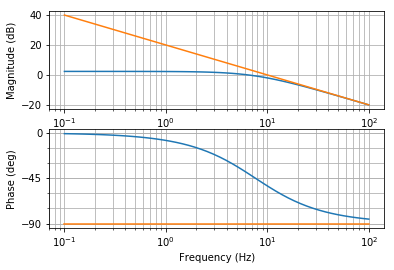

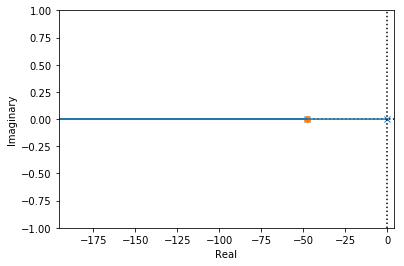

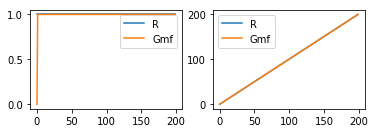

*********************************************


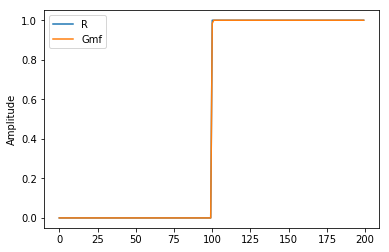

*********************************************


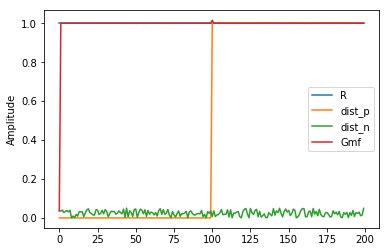

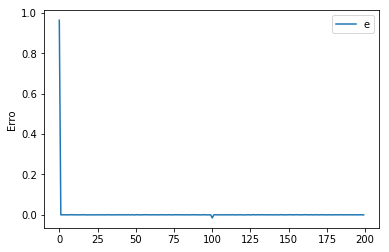

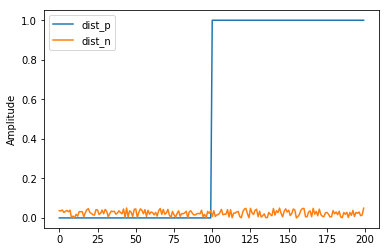

*********************************************
ev(∞) = 0.015852885225228874
ep(∞) = -197.98414711477477
*********************************************
Rlocus de gmf


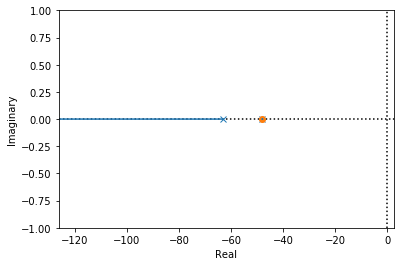

In [0]:
testControl(G_MA=G_MA, C=C, step=step, ramp=ramp, t=t, dist_p=dist_p, dist_n=dist_n)

# Controlador Proporcional Integrador Derivador (PID) por alocamento dos polos


## 2. Determinar parametros do compensador

In [0]:
# Determinando o coeficiente de amortecimento, psi = ξ
psi     = np.arange(0, 1, 0.01)
MpVetor = 100*np.exp(((-1*psi*np.pi)/np.sqrt(1-psi**2)))
MpLoc   = np.where(MpVetor>=(Mp_esp-Mp_folga))[-1][-1] + 1
psi     = round(psi[MpLoc], 4)

print(f"ξ  = {psi}")

# Determinando a frequencia natural, Wn
Wn_s    = symbols('Wn_s')
eq_Wn   = [4/(psi*Wn_s)-ts_esp]
Wn      = solve(eq_Wn, Wn_s)
Wn      = round(Wn[Wn_s], 4)

print(f"Wn = {Wn}\t rad/s")

# Parametros de uma função de 2ª ordem
sigma   = psi * Wn
Wd      = Wn * np.sqrt(1-psi**2)

print(f"σ  = {sigma}")
print(f"Wd = {Wd}")

ξ  = 0.7
Wn = 2.8571	 rad/s
σ  = 1.9999699999999998
Wd = 2.0403775163189777


## 3. Projetando o compensador PID

In [0]:
# parametros do compensador
Kc = 2* psi * p / (Kp_MA * Wn)
Ti = Kc * Kp_MA / p
Td = p / Kc

print(f"Kc = {Kc}")
print(f"Ti = {Ti}")
print(f"Td = {Td}")

# Compensador PI
C = tf(np.array([Kc*Ti*Td,Kc*Ti,Kc], dtype=float), np.array([Ti,0], dtype=float))

print(f"C = {C}")

Kc = 0.07768030280758587
Ti = 0.49000735011025165
Td = 128.73276285714286
C = 
4.9 s^2 + 0.03806 s + 0.07768
-----------------------------
            0.49 s



## 4. Verifica o comportamento do sistema com o compensador

Malha Aberta
C(s) * G(s) = 
309.1 s^2 + 2.401 s + 4.9
-------------------------
    0.49 s^2 + 23.49 s

*********************************************
Malha Fechada
Gmf = 
309.1 s^2 + 2.401 s + 4.9
-------------------------
309.6 s^2 + 25.89 s + 4.9

*********************************************
stepinfo: 
	RiseTime: 0.0
	SettlingTime: 73.23899751040233
	SettlingMin: 0.6093508877782186
	SettlingMax: 1.1291364280537004
	Overshoot: 11930.498051057968
	Undershoot: 0.6093508877782186
	Peak: 1.1291364280537004
	PeakTime: 36.87089119516822
	SteadyStateValue: 0.9995037858577694
Rlocus de C(s) * G(s):


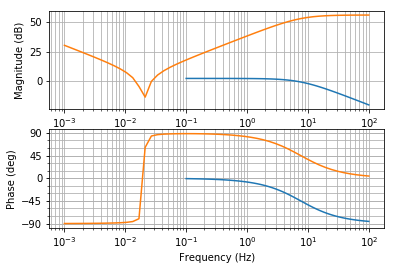

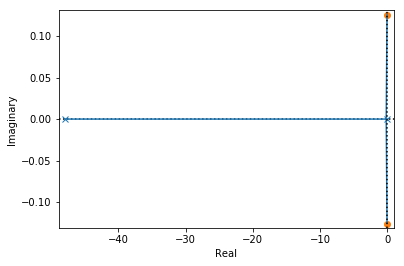

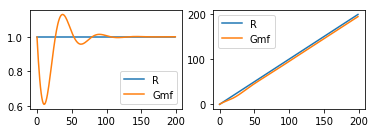

*********************************************


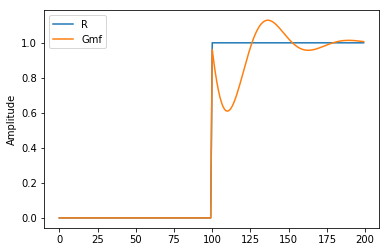

*********************************************


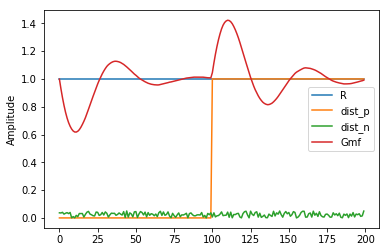

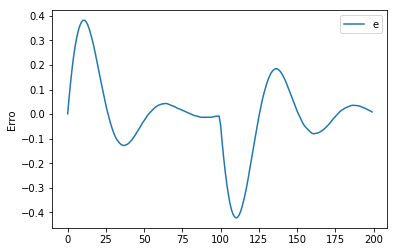

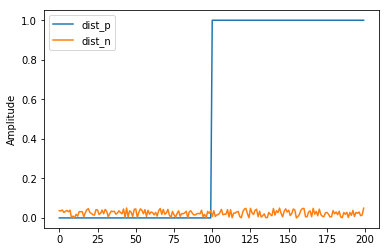

*********************************************
ev(∞) = 4.793348017081684
ep(∞) = -193.20665198291832
*********************************************
Rlocus de gmf


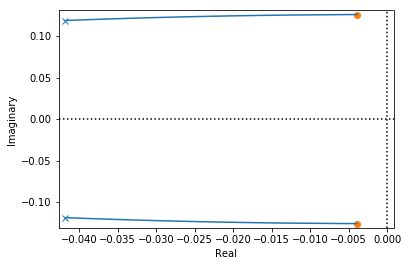

In [0]:
testControl(G_MA=G_MA, C=C, step=step, ramp=ramp, t=t, dist_p=dist_p, dist_n=dist_n)